## Other Odds and Ends

Today, I'll introduce you to a few more modules, but ones that are not already installed, so you learn how to access modules other people have created. That way, you can search up whatever module you need and install it. We will install [**BioPython**](http://biopython.org/), a module with many functions for reading and parsing sequence data, and [**msprime**](https://msprime.readthedocs.io/en/stable/), which is a library that simulates genetic data using coalescent theory. 


### Biopython

One of the things we're teaching you in this course is how to use existing biology-centric modules in python so you don't have to re-invent the wheel! (Although, sometimes, re-inventing the wheel can be a useful teaching exercise...). Today, we'll be exploring the **Biopython** module. Biopython is a package with a collection of useful tools for bioinformatics. It can do things like parse sequence files in a variety of different formats (.fasta, .fastq, clustal alignment files, ExPASy files, Swiss Prot, etc), provide code to manipulate sequences (for example, perform transcription, translation, or reverse-complement), and interface with many useful databases on NCBI (Entrez, Pubmed, Blast).

To install Biopython, we are going to use the package manager pip. Pip's name is a recursive acronym that stands for "Pip Installs Packages". I recommend doing this in Terminal, rather than in Jupyter Notebook. Then, close your Jupyter Notebook Terminal, and re-open a new one, to make sure the installation was recognized. Because this can be a hassle, let's just install the other Python library we'll be using, msprime, as well. 

```bash
pip install biopython
pip install msprime
```

Now, if you try to import the modules **Bio** (for Biopython) and **msprime**, if no error is thrown, then the installation was successful!

In [1]:
import Bio
import msprime

## Using the SeqIO Module

One of the more useful sub-modules is SeqIO, which does input/output for sequences (and, I'm sorry to say, probably does it better than the FASTA parsers we've written thus far). SeqIO has a special sequence "class" that associates various attributes with sequence objects (some are methods, and some are variables). Let's look at an example parsing the cerevisiae_genome.fasta file from the first day of class.

In [2]:
from Bio import SeqIO
 
# SeqIO.parse will parse a fasta file
# It returns an iterator object of sequence records
# each with its own attributes
pD="/Users/myang/YangLab/PythonBootcamp/resources/"
fastaFile = pD+'cerevisiae_genome.fasta'
for record in SeqIO.parse(fastaFile,format="fasta"):
    print (record)
    print ()
    break

ID: tpg|BK006935.2|
Name: tpg|BK006935.2|
Description: tpg|BK006935.2| [organism=Saccharomyces cerevisiae S288c] [strain=S288c] [moltype=genomic] [chromosome=I] [note=R64-1-1]
Number of features: 0
Seq('CCACACCACACCCACACACCCACACACCACACCACACACCACACCACACCCACA...GGG', SingleLetterAlphabet())



So you can see that each of these record objects holds quite a bit of information. Each record object also has special methods associated with it that you can use to pull specific bits of data about each sequence record. For example:

In [3]:
pD="/Users/myang/YangLab/PythonBootcamp/resources/"
fastaFile = pD+'cerevisiae_genome.fasta'
for record in SeqIO.parse(fastaFile,format="fasta"):
    print ("This is the name of the sequence record: ",record.name)
    # The .seq method references a sequence object
    # That is indexed and can therefore be sliced
    print ("these are the first 50 bases:")
    print (record.seq[0:50])
    print (type(record.seq))
    print ()
    break

This is the name of the sequence record:  tpg|BK006935.2|
these are the first 50 bases:
CCACACCACACCCACACACCCACACACCACACCACACACCACACCACACC
<class 'Bio.Seq.Seq'>



Though the data type for the sequences is not a string, this is not usually an issue, as most methods and functions you apply to strings also will work for the Seq data type. This is all I will say about this module now, but you are free to explore the **Bio** module yourself!

### msprime

The other module is **msprime**, which we installed above. 

We are just going to try an example or two from their Tutorial!

In [2]:
import msprime

tree_sequence = msprime.simulate(sample_size=5, Ne=1000)
print (tree_sequence)

The module **msprime** has the function **simulate**, which you use to simulate data. These data can be trees, as the above example shows, or sequence data, as we will show momentarily. 

Note that I put in arguments of a sample size of 5 and an effective population size of 1000. Then, what I am returned is a data object that is a 'TreeSequence' type. 

{0: 5, 1: 5, 2: 7, 3: 8, 4: 6, 5: 6, 6: 7, 7: 8}


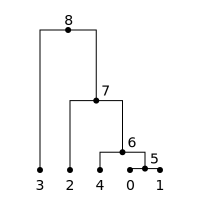

In [3]:
print (tree_sequence.trees())
for tree in tree_sequence.trees(): 
    tree.draw("tree_ex1.svg")
    print (tree)

from IPython.core.display import SVG
SVG("tree_ex1.svg")

The TreeSequence type has a method called **trees** that allows you to pull out the tree, represented here by a dictionary. In the dictionary, the key indicates the node, and the value is the parent node to which the key is attached. A -1 as the value indicates there is no parent node - you are at the root of the tree. Note that here, there is no information on length of the branch - it is only information on the splitting order - the branch lengths are also simulated, they just aren't shown in the image.

The **tree** data type also has many methods, to get the parent node of another node, to retrieve an individual branch length, or to get the total branch length, for instance.

{0: 5, 1: 5, 2: 7, 3: 8, 4: 6, 5: 6, 6: 7, 7: 8}
parent of 4: 6
children of 5: (0, 1)
total branch length: 10001.441710432851
branch length for 5 (leading to parent): 444.1788103277576
time in gen until 4, starting from present: 0.0


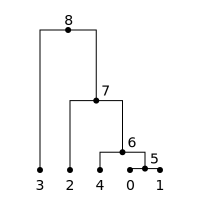

In [6]:
print (tree_sequence.trees())
for tree in tree_sequence.trees(): 
    tree.draw("tree_ex1.svg")
    print (tree)
    print ('parent of 4:', tree.get_parent(4))
    print ('children of 5:', tree.get_children(5))
    print ('total branch length:', tree.get_total_branch_length())
    print ('branch length for 5 (leading to parent):', tree.get_branch_length(5))
    print ('time in gen until 4, starting from present:',tree.get_time(4))

from IPython.core.display import SVG
SVG("tree_ex1.svg")

## Mutations 
These simulated trees are not that interesting until we get some variation in them! Mutations are what we use to study DNA, and thus, it's important to throw in a few in our simulations, to study the how the distribution of mutations change in different circumstances. 

The method **get_num_mutations** acts on the tree_sequence variable, to indicate how many total mutations were found. The **mutations** method acting on the tree variable returns a list of the Mutation data type, containing the position where the mutation occured, the node the mutation is found in, and the zero-based index of the mutation in the list. 

Without a length of sequence, however, you would have zero mutations! Thus, it is also important to mention the length of the sequence you are on. The mutation rate is in the unit "per base pair per generation". 

Total mutations =  2
Tree 0 [{'id': 0, 'site': 0, 'node': 7, 'derived_state': '1', 'parent': -1, 'metadata': b'', 'position': 2215.3058648109436, 'index': 0}, {'id': 1, 'site': 1, 'node': 5, 'derived_state': '1', 'parent': -1, 'metadata': b'', 'position': 7644.321192055941, 'index': 1}]


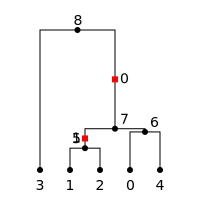

In [9]:
import msprime

tree_sequence = msprime.simulate(sample_size=5, 
                                 Ne=1000, 
                                 length=1e4, ##10000 - note use of scientific notation when #e# is used.
                                 mutation_rate=2e-08)
print ("Total mutations = ", tree_sequence.get_num_mutations())
for treeind,tree in enumerate(tree_sequence.trees()): 
    tree.draw("tree_ex2.svg")
    print ("Tree",treeind,list(tree.mutations()))

from IPython.core.display import SVG
SVG("tree_ex2.svg")

##If you observe no mutations, re-run the simulation - by chance, sometimes no mutations may occur!

## Simulating sequences

We might want sequence data instead. Below is an example:

In [17]:
import msprime
import numpy as np

def variants_example():
    tree_sequence = msprime.simulate(
        sample_size=20, Ne=1e4, length=5e3, recombination_rate=2e-8,
        mutation_rate=2e-8, random_seed=10) #Note that by specifying the random seed, I always get the same output.
    print("Simulated ", tree_sequence.get_num_mutations(), "mutations")
    mymutations={}
    for variant in tree_sequence.variants():
        mymutations[variant.index] = (variant.position, variant.genotypes)
    return (mymutations)

myrun=variants_example()
for i in myrun:
    print (i, myrun[i][0], myrun[i][1])

Simulated  4 mutations
0 2432.768327416852 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
1 2577.6939414924095 [1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
2 2844.682702049562 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
3 4784.266628557816 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


Here, we add several more arguments to **tree_sequence**. For instance, we add in the recombination_rate argument, specifying the recombination rate per base per generation. We also specify a random_seed, which tells exactly where to start simulation from. Thus, this number will tell us how to get back the exact same simulation, if needed. 

Now, if we call on the method **variants**, there is a Variant data type that contains the index, position and array of genotypes associated with each mutation. In the example above, there are seven mutations at the specified positions along the sequence, and the array specifies how many individuals have the mutation (number of 1s in the array). 

Below, we show how to create an array containing all the genotypes for each mutation. 

In [19]:
import msprime
import numpy as np

def variants_example():
    tree_sequence = msprime.simulate(
        sample_size=20, Ne=1e4, length=5e3, recombination_rate=2e-8,
        mutation_rate=2e-8, random_seed=10)
    print("Simulated ", tree_sequence.get_num_mutations(), "mutations")
    
    ##Get dimensions of array and initialize array.
    shape = tree_sequence.get_num_mutations(), tree_sequence.get_sample_size()
    mygenos=np.zeros(shape)
    
    for variant in tree_sequence.variants():
        #print variant.index, variant.position, variant.genotypes
        
        ##Add row of genotypes to correct row in array.
        mygenos[variant.index,]=variant.genotypes
    ##Return the array    
    return mygenos

print (variants_example())

Simulated  4 mutations
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Consider here, what do the rows represent? What about the columns?


Now let's consider different population sizes!

(array([ 2.,  8.,  9., 15., 17., 19., 18.,  5.,  6.,  1.]), array([ 87. ,  98.5, 110. , 121.5, 133. , 144.5, 156. , 167.5, 179. ,
       190.5, 202. ]), <a list of 10 Patch objects>)


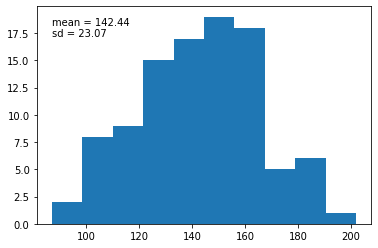

In [30]:
import msprime
import numpy as np
import matplotlib.pyplot as plt

Ne=1e5
iterations=100

mycounts=np.zeros(iterations)
for i in range(iterations):
    tree_sequence = msprime.simulate(
            sample_size=20, Ne=Ne, length=5e3, recombination_rate=2e-8,
            mutation_rate=2e-8)
    mycounts[i] = tree_sequence.get_num_mutations()

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
myhist = ax.hist(mycounts)
print (myhist)
ax.text(myhist[1].min(),myhist[0].max(),
        "mean = %.2f\nsd = %.2f" % (mycounts.mean(),mycounts.std()),
        verticalalignment='top',horizontalalignment='left')

plt.show()

##Can you modify the code to add appropriate labels in the x- and y-axes?

We have done several things above! We calculate the number of segregating sites (or the total number of mutations) using **get_num_mutations**. Then, we run this simulation several times (100 in the example), so we simulate many replicates of the number of segregating sites. Then, we send these values to an array, **mycounts**, and plot a histogram for the number of segregating sites. We add text to the figure in the top left (how did I keep it in the top left for different window sizes?) specifying the mean and standard deviation. 

Consider the following questions, and feel free to modify the above code to explore:
1. What happens if you change the number of iterations? 
2. What happens if you increase the mutation rate?
3. What happens if you adjust the sample size?
4. What happens if you adjust the sequence length?

When we try different **Ne**, the effective population size (for now, best to understand it as a _genetic_ estimate of the population size), we find that we have more mutations for larger population sizes and much less mutations for smaller population sizes. Let's make one more plot.

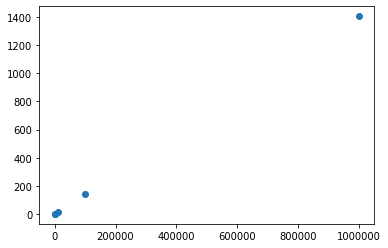

In [33]:
import msprime
import numpy as np
import matplotlib.pyplot as plt

Ne=1e5
iterations=100
nes=[1e2,1e3,1e4,1e5,1e6]
mymeans = []
mysds = []
for neind,Ne in enumerate(nes):
    mycounts=np.zeros(iterations)
    for i in range(iterations):
        tree_sequence = msprime.simulate(
                sample_size=20, Ne=Ne, length=5e3, recombination_rate=2e-8,
                mutation_rate=2e-8)
        mycounts[i] = tree_sequence.get_num_mutations()
    mymeans.append(mycounts.mean())
    mysds.append(mycounts.std()) 

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(nes,mymeans,'o')
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

Notice that we see an increase in mutations with an increase in population size. If we add a log x- and y- scale, we see a linear relationship between the x- and y- axis. This makes sense, since we are increasing each population size by an order of magnitude.

How can we modify the figure to make it more reader friendly?

**msprime** is a useful module that allows us to simulate populations with varying population sizes, divergence times, migration rates, etc. We can then get simulated sequence data under those demographic parameters, look at __expected__ patterns from the simulated sequence data, and compare these __expected__ patterns to what we __observe__ in the real data. This is one way population geneticists test new methods - see how they perform on simulated data to understand how different demographic parameters affect a genetic pattern, and use that knowledge to inform on the observed genetic patterns, where in those cases, we'd be inferring the demographic parameters from known genetic patterns. 

## More than one population

For one more level of complexity in the lesson, let's simulate TWO populations, that diverged around 1 million years ago. Below, we generate an array of genotypes with simulated sequences for both populations.


In [49]:
import numpy as np

def two_pop():
    # M is the overall symmetric migration rate, and d is the number
    # of subpopulations.
    M = 0 #0.2
    d = 2
    m = M / (2 * (d - 1))
    
    
    # Times are provided in years, so we convert into generations.
    generation_time = 25
    T_1 = 1e6 / generation_time
      
    # Allocate the initial sample. We choose five sample each
    # from the two subpopulations.
    population_configurations = [
        msprime.PopulationConfiguration(sample_size=5),
        msprime.PopulationConfiguration(sample_size=5)]
    # Now we set up the migration matrix. Since this is a symmetric
    # island model, we have the same rate of migration between all
    # pairs of subpopulations. Diagonal elements must be zero.
    migration_matrix = [
        [0, m],
        [m, 0]]
    # We pass these values to the simulate function, and ask it
    # to run the required number of replicates.
    
    ##These can include population size changes, new migration matrices, admixture events, mergings
    ##Only merging is shown here
    demographic_events = [
        # 100% of 1st subpopulation merges with 2nd subpopulation 
        # (two populations arrive at common ancestral population)
        msprime.MassMigration(
            time=T_1, source=1, destination=0, proportion=1.0)
    ]
    
    replicates = msprime.simulate(
        Ne=0.5,
        length=10e3,
        recombination_rate=2e-8,
        mutation_rate=2e-8,
        population_configurations=population_configurations,
        migration_matrix=migration_matrix,
        demographic_events=demographic_events)
    
    print ("msprime has a program that summarizes the parameters you included.")
    dd = msprime.DemographyDebugger(
        population_configurations=population_configurations,
        migration_matrix=migration_matrix,
        demographic_events=demographic_events)
    dd.print_history()
    
    shape = replicates.get_num_mutations(), replicates.get_sample_size()
    mygenos=np.zeros(shape)
    
    for variant in replicates.variants():
        mygenos[variant.index,]=variant.genotypes
    return mygenos



msprime.simulate(
            sample_size=20, Ne=Ne, length=5e3, recombination_rate=2e-8,
            mutation_rate=2e-8)
myrun=two_pop()
print ("This is the genotype array")
print (myrun)
print ()

print ("The number of mutations is:", myrun.shape[0])
print ("The number of samples is:", myrun.shape[1])

msprime has a program that summarizes the parameters you included.
Model =  hudson(reference_size=1)
Epoch: 0 -- 40000.0 generations
     start     end      growth_rate |     0        1    
   -------- --------       -------- | -------- -------- 
0 |   0.5      0.5                0 |     0        0    
1 |   0.5      0.5                0 |     0        0    

Events @ generation 40000.0
   - Mass migration: Lineages moved with probability 1.0 backwards in time with source 1 & dest 0
                     (equivalent to migration from 0 to 1 forwards in time)
Epoch: 40000.0 -- inf generations
     start     end      growth_rate |     0        1    
   -------- --------       -------- | -------- -------- 
0 |   0.5      0.5                0 |     0        0    
1 |   0.5      0.5                0 |     0        0    

This is the genotype array
[[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 

Lastly, just to show you how complex it can get when mimicking real populations, I've copied an example from **msprime** documentations trying to simulate the Out of Africa migration using three populations - from Africa, Europe, and East Asia. 

1. Can you edit the function to generate a genotype array containing five individuals from each population (15 total)?
2. As a review, why is None printed at the very end?

In [51]:
import math
def out_of_africa():
    # First we set out the maximum likelihood values of the various parameters
    # given in Table 1.
    N_A = 7300
    N_B = 2100
    N_AF = 12300
    N_EU0 = 1000
    N_AS0 = 510
    # Times are provided in years, so we convert into generations.
    generation_time = 25
    T_AF = 220e3 / generation_time
    T_B = 140e3 / generation_time
    T_EU_AS = 21.2e3 / generation_time
    # We need to work out the starting (diploid) population sizes based on
    # the growth rates provided for these two populations
    r_EU = 0.004
    r_AS = 0.0055
    N_EU = N_EU0 / math.exp(-r_EU * T_EU_AS)
    N_AS = N_AS0 / math.exp(-r_AS * T_EU_AS)
    # Migration rates during the various epochs.
    m_AF_B = 25e-5
    m_AF_EU = 3e-5
    m_AF_AS = 1.9e-5
    m_EU_AS = 9.6e-5
    # Population IDs correspond to their indexes in the population
    # configuration array. Therefore, we have 0=YRI, 1=CEU and 2=CHB
    # initially.
    population_configurations = [
        msprime.PopulationConfiguration(
            sample_size=0, initial_size=N_AF),
        msprime.PopulationConfiguration(
            sample_size=1, initial_size=N_EU, growth_rate=r_EU),
        msprime.PopulationConfiguration(
            sample_size=1, initial_size=N_AS, growth_rate=r_AS)
    ]
    migration_matrix = [
        [      0, m_AF_EU, m_AF_AS],
        [m_AF_EU,       0, m_EU_AS],
        [m_AF_AS, m_EU_AS,       0],
    ]
    demographic_events = [
        # CEU and CHB merge into B with rate changes at T_EU_AS
        msprime.MassMigration(
            time=T_EU_AS, source=2, destination=1, proportion=1.0),
        msprime.MigrationRateChange(time=T_EU_AS, rate=0),
        msprime.MigrationRateChange(
            time=T_EU_AS, rate=m_AF_B, matrix_index=(0, 1)),
        msprime.MigrationRateChange(
            time=T_EU_AS, rate=m_AF_B, matrix_index=(1, 0)),
        msprime.PopulationParametersChange(
            time=T_EU_AS, initial_size=N_B, growth_rate=0, population_id=1),
        # Population B merges into YRI at T_B
        msprime.MassMigration(
            time=T_B, source=1, destination=0, proportion=1.0),
        msprime.MigrationRateChange(time=T_B, rate=0),
        # Size changes to N_A at T_AF
        msprime.PopulationParametersChange(
            time=T_AF, initial_size=N_A, population_id=0)
    ]
    # Use the demography debugger to print out the demographic history
    # that we have just described.
    dd = msprime.DemographyDebugger(
        population_configurations=population_configurations,
        migration_matrix=migration_matrix,
        demographic_events=demographic_events)
    dd.print_history()
    
print (out_of_africa())

Model =  hudson(reference_size=1)
Epoch: 0 -- 848.0 generations
     start     end      growth_rate |     0        1        2    
   -------- --------       -------- | -------- -------- -------- 
0 |1.23e+04 1.23e+04              0 |     0      3e-05   1.9e-05 
1 |2.97e+04   1e+03           0.004 |   3e-05      0     9.6e-05 
2 |5.41e+04    510           0.0055 |  1.9e-05  9.6e-05     0    

Events @ generation 848.0
   - Mass migration: Lineages moved with probability 1.0 backwards in time with source 2 & dest 1
                     (equivalent to migration from 1 to 2 forwards in time)
   - Migration rate change to 0 everywhere
   - Migration rate change for (0, 1) to 0.00025
   - Migration rate change for (1, 0) to 0.00025
   - Population parameter change for 1: initial_size -> 2100 growth_rate -> 0 
Epoch: 848.0 -- 5600.0 generations
     start     end      growth_rate |     0        1        2    
   -------- --------       -------- | -------- -------- -------- 
0 |1.23e+04 1.23e+

## Congrats!

You've gone through all the lessons I have on Python. There's lots more to discover, but you should be in good shape to start writing scripts for what you need, and have a pretty good set of vocabulary and troubleshooting ability to use Google to help you with the rest. I invite you to revisit these lessons, especially ones you found difficult, to keep your Python-ing fresh, or to mess around with new functions, particularly from the modules I introduced in the latter half of the course. 

Enjoy coding!